1.	利用seaborn读入在线数据tatanic（titanic=sns.load_dataset('titanic')）

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
titanic = sns.load_dataset('titanic')

2.	查看前10行数据

In [26]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


3.	查看有哪些列

In [28]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

4.	统计每列的缺失值

In [29]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

5.	删除age字段中有缺失值的行

In [30]:
del_titanic = titanic.dropna(subset=['age'])
del_titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

6、统计年龄的分布情况，用matplotlib绘制年龄的直方图，如下图

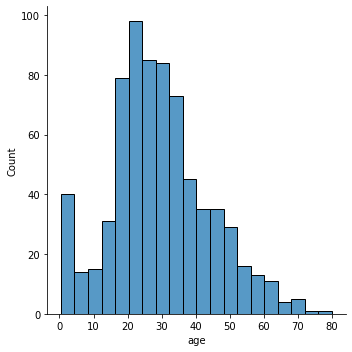

In [31]:
sns.displot(del_titanic['age'])

7.	用均值进行年龄的缺失值填充

In [32]:
titanic['age']=titanic['age'].fillna(titanic['age'].mean())

In [34]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


8.	用seaborn绘制如下直方图（带有概率密度估计曲线）

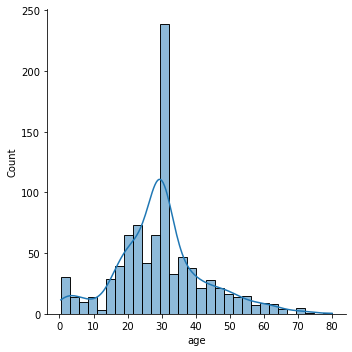

In [35]:
sns.displot(titanic['age'],kde=True)

9.	统计登船地点（embarked），将登船地点为空的行用“S”填充

In [38]:
titanic_fill=titanic
titanic_fill['embarked'] = titanic['embarked'].fillna('S')
titanic_fill['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

10.	利用seaborn绘制如下箱线图，表示不同性别年龄的分布情况

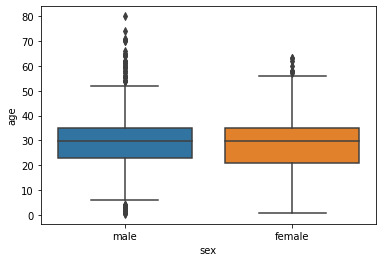

In [39]:
xxt = sns.boxplot(x='sex', y='age', data=titanic) 

11.	对船舱等级进行计数，绘制如下柱状图：

<AxesSubplot:>

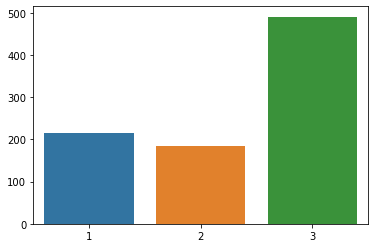

In [41]:
number = titanic['pclass'].value_counts()
sns.barplot(x=number.index,y=number.values)

12.	结合船舱等级，绘制乘客年龄分布，绘制乘客年龄分布的琴图

<AxesSubplot:xlabel='pclass', ylabel='age'>

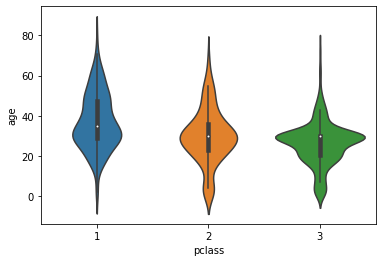

In [42]:
sns.violinplot(x=titanic['pclass'],y=titanic['age'])